<h1> Week 06 Functional Notebook

**By:** Andrew Williams 

**Partner:** Ben Brassette
    
**Description:** Purpose of this notebook is to create a "functional" notebook using commute mode of travel to work and commute time while demonstrating use of using a function and a loop. After seeing others midterm projects and some brutal feedback, I'm going to try and better intergrate our data and give a fuller picute of public transit in LA.

**Notes for self to advance project:**
* Overlay heavy rail and light rail stops
* Provide more accurate description of the areas through a spatial join
* Compare with race/ethnicity and income data; we should create some side by side comparisons of transit use and race/eth and income
* Query "high" trasnit tracts, cross reference with income and race/eth, potential to add spatial dimension of LA neighborhoods
* Availability of cars in households
* Bring a shaprer focus to Central LA and the San Fernando Valley

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></li></li><span><a href="#Library-Import" data-toc-modified-id="Library-Import"><span class="toc-item-num"></span>Library Import</a></span><ul class="toc-item"></li></li><span><a href="#Mode-of-Travel" data-toc-modified-id="Mode-of-Travel"><span class="toc-item-num"></span>Mode of Travel</a></span><ul class="toc-item"></li></li><span><a href="#Commute-Time" data-toc-modified-id="Commute-Time"><span class="toc-item-num"></span>Commute Time</a></span><ul class="toc-item"></li></li><span><a href="#Analysis-(with-function-and-loop)" data-toc-modified-id="Analysis-(with-function-and-loop)"><span class="toc-item-num"></span>Analysis (with function and loop)</a></span></span><ul class="toc-item"></li></li><span><a href="#Analysis-(with-function-and-loop)" data-toc-modified-id="Analysis-(with-function-and-loop)"><span class="toc-item-num"></span>Analysis (with function and loop)</a></span

# Library Import 


Importing various libaries

In [1]:
import urllib.request, json 
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns 

Libraries good to go. 

# Mode of Travel

Import data and run quick analysis of data.

In [2]:
#transporation means to work
means2work = gpd.read_file('Data/Means_Transpo_Work_Tract/acs2019_5yr_B08301_14000US06037185320.geojson')

In [3]:
type(means2work)

geopandas.geodataframe.GeoDataFrame

In [4]:
list(means2work)

['geoid',
 'name',
 'B08301001',
 'B08301001, Error',
 'B08301002',
 'B08301002, Error',
 'B08301003',
 'B08301003, Error',
 'B08301004',
 'B08301004, Error',
 'B08301005',
 'B08301005, Error',
 'B08301006',
 'B08301006, Error',
 'B08301007',
 'B08301007, Error',
 'B08301008',
 'B08301008, Error',
 'B08301009',
 'B08301009, Error',
 'B08301010',
 'B08301010, Error',
 'B08301011',
 'B08301011, Error',
 'B08301012',
 'B08301012, Error',
 'B08301013',
 'B08301013, Error',
 'B08301014',
 'B08301014, Error',
 'B08301015',
 'B08301015, Error',
 'B08301016',
 'B08301016, Error',
 'B08301017',
 'B08301017, Error',
 'B08301018',
 'B08301018, Error',
 'B08301019',
 'B08301019, Error',
 'B08301020',
 'B08301020, Error',
 'B08301021',
 'B08301021, Error',
 'geometry']

In [5]:
means2work.shape

(1005, 45)

In [6]:
means2work.head(4)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",2027.0,253.0,1860.0,265.0,1656.0,270.0,204.0,80.0,...,12.0,0.0,12.0,0.0,12.0,26.0,36.0,82.0,52.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1834.0,175.0,1730.0,178.0,1617.0,186.0,113.0,91.0,...,12.0,0.0,12.0,10.0,16.0,0.0,12.0,77.0,46.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",3057.0,438.0,2699.0,411.0,2430.0,356.0,269.0,197.0,...,17.0,0.0,17.0,74.0,65.0,72.0,63.0,129.0,95.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."
3,14000US06037101220,"Census Tract 1012.20, Los Angeles, CA",1593.0,202.0,1439.0,200.0,1323.0,201.0,116.0,67.0,...,12.0,0.0,12.0,8.0,13.0,30.0,42.0,68.0,52.0,"MULTIPOLYGON (((-118.28593 34.25227, -118.2859..."


In [7]:
means2work.tail(4)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1964868.0,5629.0,1541762.0,6099.0,1368251.0,6262.0,173511.0,3251.0,...,495.0,18897.0,930.0,67341.0,1930.0,25181.0,1195.0,123270.0,2531.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Data look normal and as expexted for a gpd. I will delete the last row as it represents the combined city total.

In [8]:
#dropped la city total
means2work = means2work.drop([1004])

In [9]:
means2work.tail(3)

,geoid,name,B08301001,"B08301001, Error",B08301002,"B08301002, Error",B08301003,"B08301003, Error",B08301004,"B08301004, Error",...,"B08301017, Error",B08301018,"B08301018, Error",B08301019,"B08301019, Error",B08301020,"B08301020, Error",B08301021,"B08301021, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,15.0,26.0,0.0,12.0,...,12.0,5.0,7.0,0.0,12.0,4.0,6.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


Last data point is dropped. 

I'm deleting my standard deviation or "error" rows and dropping the breakdown of carpooling. Will re-define my variable and test it out. 

In [10]:
columns_to_keep = ['geoid',
 'name',
 'B08301001',
 'B08301002',
 'B08301003',
 'B08301004',
 'B08301010',
 'B08301011',
 'B08301012',
 'B08301013',
 'B08301014',
 'B08301016',
 'B08301017',
 'B08301018',
 'B08301019',
 'B08301020',
 'B08301021',
 'geometry']

In [11]:
means2work = means2work [columns_to_keep]

In [12]:
means2work.sample()

,geoid,name,B08301001,B08301002,B08301003,B08301004,B08301010,B08301011,B08301012,B08301013,B08301014,B08301016,B08301017,B08301018,B08301019,B08301020,B08301021,geometry
41,14000US06037106114,"Census Tract 1061.14, Los Angeles, CA",2479.0,2324.0,1791.0,533.0,36.0,36.0,0.0,0.0,0.0,13.0,16.0,0.0,42.0,18.0,30.0,"MULTIPOLYGON (((-118.43676 34.30749, -118.4352..."


Great, columns have been dropped, but now will relabel them appropriately. 

In [13]:
#renaming columns
means2work.columns = ['geoid',
 'name',
 'Total',
 'Car, truck, or van',
 'Drove alone',
 'Carpooled',
 'Public transportation',
 'Bus',
 'Subway or elevated il',
 'Long-distance train or commuter rail',
 'Light rail, streetcar or trolley',
 'Taxicab',
 'Motorcycle',
 'Bicycle',
 'Walked',
 'Other means',
 'Worked from home',
 'geometry']

In [14]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,"Light rail, streetcar or trolley",Taxicab,Motorcycle,Bicycle,Walked,Other means,Worked from home,geometry
142,14000US06037120030,"Census Tract 1200.30, Los Angeles, CA",1187.0,800.0,613.0,187.0,277.0,267.0,10.0,0.0,0.0,7.0,0.0,38.0,43.0,10.0,12.0,"MULTIPOLYGON (((-118.45529 34.21791, -118.4544..."


Fantastic, columns have been re-named as seen in the sample above.

To make appropriate comparisons, will create percenates for each category.

In [15]:
means2work['Percent Car, truck, or van'] = means2work['Car, truck, or van']/means2work['Total']*100
means2work['Percent Drove alone'] = means2work['Drove alone']/means2work['Total']*100
means2work['Percent Carpooled'] = means2work['Carpooled']/means2work['Total']*100
means2work['Percent Public transportation'] = means2work['Public transportation']/means2work['Total']*100
means2work['Percent Bus'] = means2work['Bus']/means2work['Total']*100
means2work['Percent Subway or elevated il'] = means2work['Subway or elevated il']/means2work['Total']*100
means2work['Percent Long-distance train or commuter rail'] = means2work['Long-distance train or commuter rail']/means2work['Total']*100
means2work['Percent Light rail, streetcar or trolley'] = means2work['Light rail, streetcar or trolley']/means2work['Total']*100
means2work['Percent Taxicab'] = means2work['Taxicab']/means2work['Total']*100
means2work['Percent Motorcycle'] = means2work['Motorcycle']/means2work['Total']*100
means2work['Percent Bicycle'] = means2work['Bicycle']/means2work['Total']*100
means2work['Percent Walked'] = means2work['Walked']/means2work['Total']*100
means2work['Percent Other means'] = means2work['Other means']/means2work['Total']*100
means2work['Percent Worked from home'] = means2work['Worked from home']/means2work['Total']*100

In [16]:
means2work.sample()

,geoid,name,Total,"Car, truck, or van",Drove alone,Carpooled,Public transportation,Bus,Subway or elevated il,Long-distance train or commuter rail,...,Percent Bus,Percent Subway or elevated il,Percent Long-distance train or commuter rail,"Percent Light rail, streetcar or trolley",Percent Taxicab,Percent Motorcycle,Percent Bicycle,Percent Walked,Percent Other means,Percent Worked from home
624,14000US06037214400,"Census Tract 2144, Los Angeles, CA",2048.0,1539.0,1470.0,69.0,55.0,35.0,0.0,0.0,...,1.708984,0.0,0.0,0.976562,0.390625,0.390625,1.611328,1.5625,2.34375,15.869141


Lovely, percent columns have been added to my dataset.

# Commute Time

Import data and run quick analysis of data.

In [17]:
time_m2w = gpd.read_file('Data/time_means2work/acs2019_5yr_B08134_14000US06037185320.geojson')

In [18]:
type(time_m2w)

geopandas.geodataframe.GeoDataFrame

In [19]:
time_m2w.shape

(1005, 243)

In [20]:
time_m2w.head(3)

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
0,14000US06037101110,"Census Tract 1011.10, Los Angeles, CA",1945.0,257.0,86.0,74.0,82.0,67.0,115.0,63.0,...,12.0,1.0,2.0,0.0,12.0,0.0,12.0,24.0,35.0,"MULTIPOLYGON (((-118.30229 34.25870, -118.3009..."
1,14000US06037101122,"Census Tract 1011.22, Los Angeles, CA",1757.0,174.0,9.0,16.0,17.0,20.0,39.0,49.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.30334 34.27371, -118.3033..."
2,14000US06037101210,"Census Tract 1012.10, Los Angeles, CA",2928.0,425.0,280.0,202.0,277.0,127.0,310.0,146.0,...,17.0,16.0,26.0,0.0,17.0,0.0,17.0,30.0,39.0,"MULTIPOLYGON (((-118.29945 34.25598, -118.2979..."


In [21]:
time_m2w.tail(3)

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,9.0,7.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."
1004,16000US0644000,"Los Angeles, CA",1841598.0,6239.0,107784.0,2748.0,170859.0,2908.0,229791.0,3044.0,...,362.0,9712.0,836.0,3427.0,431.0,3700.0,429.0,6317.0,520.0,"MULTIPOLYGON (((-118.66818 34.18987, -118.6681..."


Overall, data looks pretty straight forward. I would like to drop the LA City geoid, remove the standard deviation columns, and trim the columns I want use by looking at the metafile. 

Dropping LA City.

In [22]:
time_m2w = time_m2w.drop([1004])
time_m2w.tail(3)

,geoid,name,B08134001,"B08134001, Error",B08134002,"B08134002, Error",B08134003,"B08134003, Error",B08134004,"B08134004, Error",...,"B08134116, Error",B08134117,"B08134117, Error",B08134118,"B08134118, Error",B08134119,"B08134119, Error",B08134120,"B08134120, Error",geometry
1001,14000US06037980028,"Census Tract 9800.28, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.45246 33.94315, -118.4464..."
1002,14000US06037980031,"Census Tract 9800.31, Los Angeles, CA",24.0,27.0,15.0,26.0,9.0,7.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.29105 33.75378, -118.2905..."
1003,14000US06037990200,"Census Tract 9902, Los Angeles, CA",0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,...,12.0,0.0,12.0,0.0,12.0,0.0,12.0,0.0,12.0,"MULTIPOLYGON (((-118.63598 34.03255, -118.6325..."


LA City dropped.

Deciding columns to keep and then renaming them.

In [23]:
columns_to_keep = ['geoid',
 'name',
 'B08134001',
 'B08134002',
 'B08134003',
 'B08134004',
 'B08134005',
 'B08134006',
 'B08134007',
 'B08134008',
 'B08134009',
 'B08134010',
 'B08134011',
 'B08134012',
 'B08134013',
 'B08134014',
 'B08134015',
 'B08134016',
 'B08134017',
 'B08134018',
 'B08134019',
 'B08134020',
 'B08134021',
 'B08134022',
 'B08134023',
 'B08134024',
 'B08134025',
 'B08134026',
 'B08134027',
 'B08134028',
 'B08134029',
 'B08134030',
 'B08134031',
 'B08134032',
 'B08134033',
 'B08134034',
 'B08134035',
 'B08134036',
 'B08134037',
 'B08134038',
 'B08134039',
 'B08134040',
 'B08134061',
 'B08134062',
 'B08134063',
 'B08134064',
 'B08134065',
 'B08134066',
 'B08134067',
 'B08134068',
 'B08134069',
 'B08134070',
 'B08134071',
 'B08134072',
 'B08134073',
 'B08134074',
 'B08134075',
 'B08134076',
 'B08134077',
 'B08134078',
 'B08134079',
 'B08134080',
 'B08134081',
 'B08134082',
 'B08134083',
 'B08134084',
 'B08134085',
 'B08134086',
 'B08134087',
 'B08134088',
 'B08134089',
 'B08134090',
 'B08134091',
 'B08134092',
 'B08134093', 
 'B08134094',
 'B08134095',
 'B08134096',
 'B08134097',
 'B08134098',
 'B08134099',
 'B08134100',
 'B08134101',
 'B08134102',
 'B08134103',
 'B08134104',
 'B08134105',
 'B08134106',
 'B08134107',
 'B08134108',
 'B08134109',
 'B08134110',
 'geometry']

In [24]:
time_m2w = time_m2w[columns_to_keep]

In [25]:
time_m2w.sample(3)

,geoid,name,B08134001,B08134002,B08134003,B08134004,B08134005,B08134006,B08134007,B08134008,...,B08134102,B08134103,B08134104,B08134105,B08134106,B08134107,B08134108,B08134109,B08134110,geometry
648,14000US06037218120,"Census Tract 2181.20, Los Angeles, CA",2012.0,31.0,68.0,282.0,223.0,86.0,611.0,266.0,...,21.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.32366 34.04585, -118.3233..."
166,14000US06037122200,"Census Tract 1222, Los Angeles, CA",1432.0,84.0,176.0,227.0,185.0,71.0,234.0,109.0,...,6.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.36872 34.21944, -118.3680..."
150,14000US06037120400,"Census Tract 1204, Los Angeles, CA",3221.0,107.0,443.0,501.0,376.0,85.0,852.0,296.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.43733 34.22644, -118.4365..."


In [26]:
time_m2w.columns = ['geoid',
'name',
'Total',   
"t_Less than 10 minutes",
"t_10 to 14 minutes",
"t_15 to 19 minutes",
"t_20 to 24 minutes",
"t_25 to 29 minutes",
"t_30 to 34 minutes",
"t_35 to 44 minutes",
"t_45 to 59 minutes",
"t_60 or more minutes",
"Car, truck, or van",
"c_Less than 10 minutes",
"c_10 to 14 minutes",
"c_15 to 19 minutes",
"c_20 to 24 minutes",
"c_25 to 29 minutes",
"c_30 to 34 minutes",
"c_35 to 44 minutes",
"c_45 to 59 minutes",
"c_60 or more minutes",
"Drove alone",
"da_Less than 10 minutes",
"da_10 to 14 minutes",
"da_15 to 19 minutes",
"da_20 to 24 minutes",
"da_25 to 29 minutes",
"da_30 to 34 minutes",
"da_35 to 44 minutes",
"da_45 to 59 minutes",
"da_60 or more minutes",
"Carpooled",
"cp_Less than 10 minutes",
"cp_10 to 14 minutes",
"cp_15 to 19 minutes",
"cp_20 to 24 minutes",
"cp_25 to 29 minutes",
"cp_30 to 34 minutes",
"cp_35 to 44 minutes",
"cp_45 to 59 minutes",
"cp_60 or more minutes",
"Public transportation",
"pt_Less than 10 minutes",
"pt_10 to 14 minutes",
"pt_15 to 19 minutes",
"pt_20 to 24 minutes",
"pt_25 to 29 minutes",
"pt_30 to 34 minutes",
"pt_35 to 44 minutes",
"pt_45 to 59 minutes",
"pt_60 or more minutes",
"Bus",
"b_Less than 10 minutes",
"b_10 to 14 minutes",
"b_15 to 19 minutes",
"b_20 to 24 minutes",
"b_25 to 29 minutes",
"b_30 to 34 minutes",
"b_35 to 44 minutes",
"b_45 to 59 minutes",
"b_60 or more minutes",
"Subway or elevated rail, Light rail",
"s_Less than 10 minutes",
"s_10 to 14 minutes",
"s_15 to 19 minutes",
"s_20 to 24 minutes",
"s_25 to 29 minutes",
"s_30 to 34 minutes",
"s_35 to 44 minutes",
"s_45 to 59 minutes",
"s_60 or more minutes",
"Long-distance train or commuter rail or Ferryboat",
"ldt_Less than 10 minutes",
"ldt_10 to 14 minutes",
"ldt_15 to 19 minutes",
"ldt_20 to 24 minutes",
"ldt_25 to 29 minutes",
"ldt_30 to 34 minutes",
"ldt_35 to 44 minutes",
"ldt_45 to 59 minutes",
"ldt_60 or more minutes",
"Walked",
"w_Less than 10 minutes",
"w_10 to 14 minutes",
"w_15 to 19 minutes",
"w_20 to 24 minutes",
"w_25 to 29 minutes",
"w_30 to 34 minutes",
"w_35 to 44 minutes",
"w_45 to 59 minutes",
"w_60 or more minutes",
 'geometry']

In [27]:
time_m2w.sample(3)

,geoid,name,Total,t_Less than 10 minutes,t_10 to 14 minutes,t_15 to 19 minutes,t_20 to 24 minutes,t_25 to 29 minutes,t_30 to 34 minutes,t_35 to 44 minutes,...,w_Less than 10 minutes,w_10 to 14 minutes,w_15 to 19 minutes,w_20 to 24 minutes,w_25 to 29 minutes,w_30 to 34 minutes,w_35 to 44 minutes,w_45 to 59 minutes,w_60 or more minutes,geometry
601,14000US06037212303,"Census Tract 2123.03, Los Angeles, CA",2020.0,123.0,116.0,215.0,164.0,159.0,541.0,127.0,...,29.0,25.0,21.0,20.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.29540 34.06177, -118.2941..."
130,14000US06037119202,"Census Tract 1192.02, Los Angeles, CA",2259.0,59.0,193.0,332.0,377.0,187.0,347.0,145.0,...,17.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.45054 34.25062, -118.4497..."
353,14000US06037181000,"Census Tract 1810, Los Angeles, CA",2571.0,79.0,226.0,332.0,299.0,102.0,259.0,390.0,...,0.0,12.0,0.0,0.0,0.0,16.0,0.0,0.0,0.0,"MULTIPOLYGON (((-118.22860 34.14689, -118.2285..."


Creating percent columns for total, car use, and public transit. Will explore other categories as needed.

In [28]:
time_m2w['Percent t_Less than 10 minutes'] = time_m2w['t_Less than 10 minutes']/time_m2w['Total']*100
time_m2w['Percent t_15 to 19 minutes'] = time_m2w['t_15 to 19 minutes']/time_m2w['Total']*100
time_m2w['Percent t_20 to 24 minutes'] = time_m2w['t_20 to 24 minutes']/time_m2w['Total']*100
time_m2w['Percent t_25 to 29 minutes'] = time_m2w['t_25 to 29 minutes']/time_m2w['Total']*100
time_m2w['Percent t_30 to 34 minutes'] = time_m2w['t_30 to 34 minutes']/time_m2w['Total']*100
time_m2w['Percent t_35 to 44 minutes'] = time_m2w['t_35 to 44 minutes']/time_m2w['Total']*100
time_m2w['Percent t_45 to 59 minutes'] = time_m2w['t_45 to 59 minutes']/time_m2w['Total']*100
time_m2w['Percent t_60 or more minutes'] = time_m2w['t_60 or more minutes']/time_m2w['Total']*100
time_m2w['Percent c_Less than 10 minutes'] = time_m2w['c_Less than 10 minutes']/time_m2w['Total']*100
time_m2w['Percent c_15 to 19 minutes'] = time_m2w['c_15 to 19 minutes']/time_m2w['Total']*100
time_m2w['Percent c_20 to 24 minutes'] = time_m2w['c_20 to 24 minutes']/time_m2w['Total']*100
time_m2w['Percent c_25 to 29 minutes'] = time_m2w['c_25 to 29 minutes']/time_m2w['Total']*100
time_m2w['Percent c_30 to 34 minutes'] = time_m2w['c_30 to 34 minutes']/time_m2w['Total']*100
time_m2w['Percent c_35 to 44 minutes'] = time_m2w['c_35 to 44 minutes']/time_m2w['Total']*100
time_m2w['Percent c_45 to 59 minutes'] = time_m2w['c_45 to 59 minutes']/time_m2w['Total']*100
time_m2w['Percent c_60 or more minutes'] = time_m2w['c_60 or more minutes']/time_m2w['Total']*100
time_m2w['Percent pt_Less than 10 minutes'] = time_m2w['pt_Less than 10 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_15 to 19 minutes'] = time_m2w['pt_15 to 19 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_20 to 24 minutes'] = time_m2w['pt_20 to 24 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_25 to 29 minutes'] = time_m2w['pt_25 to 29 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_30 to 34 minutes'] = time_m2w['pt_30 to 34 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_35 to 44 minutes'] = time_m2w['pt_35 to 44 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_45 to 59 minutes'] = time_m2w['pt_45 to 59 minutes']/time_m2w['Public transportation']*100
time_m2w['Percent pt_60 or more minutes'] = time_m2w['pt_60 or more minutes']/time_m2w['Public transportation']*100

**Note that instead of using total as my demoninator for public transt stops, I used the public transit total number in order to get a more accurate read of transit use relative to the proportion of those actually using transit.**

In [29]:
time_m2w.sample(3)

,geoid,name,Total,t_Less than 10 minutes,t_10 to 14 minutes,t_15 to 19 minutes,t_20 to 24 minutes,t_25 to 29 minutes,t_30 to 34 minutes,t_35 to 44 minutes,...,Percent c_45 to 59 minutes,Percent c_60 or more minutes,Percent pt_Less than 10 minutes,Percent pt_15 to 19 minutes,Percent pt_20 to 24 minutes,Percent pt_25 to 29 minutes,Percent pt_30 to 34 minutes,Percent pt_35 to 44 minutes,Percent pt_45 to 59 minutes,Percent pt_60 or more minutes
48,14000US06037106520,"Census Tract 1065.20, Los Angeles, CA",2727.0,151.0,279.0,281.0,255.0,255.0,645.0,315.0,...,4.950495,14.704804,0.0,0.0,15.789474,0.0,68.421053,15.789474,0.000000,0.000000
991,14000US06037980010,"Census Tract 9800.10, Los Angeles, CA",32.0,1.0,0.0,8.0,0.0,6.0,8.0,0.0,...,25.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.000000,100.000000
866,14000US06037267600,"Census Tract 2676, Los Angeles, CA",1387.0,180.0,200.0,185.0,126.0,84.0,256.0,35.0,...,10.165826,9.372747,0.0,0.0,29.577465,0.0,18.309859,0.000000,33.802817,18.309859


New percentage columns created. 

# Analysis (with function and loop)

## Mode of Travel Indicators

Creating an indicator list for chosen variables. Explanation given in charts section for why these variables were chosen.

In [30]:
m2w_indicators = ['Percent Car, truck, or van',
'Percent Drove alone',
'Percent Carpooled',
'Percent Public transportation',
'Percent Bus',
'Percent Subway or elevated il',
'Percent Long-distance train or commuter rail',
'Percent Light rail, streetcar or trolley',
'Percent Walked',
'Percent Worked from home',]

New variable created.

Want to check the type. I've had some problems previously, so I would like to ensure I have a list.

In [31]:
type(m2w_indicators)

list

Success.

I'm going to look at the means for my categories.

In [32]:
for indicator in m2w_indicators:
    print ('mean for ' + indicator + ' is ' + str(means2work[m2w_indicators].mean()))

mean for Percent Car, truck, or van is Percent Car, truck, or van                      78.016710
Percent Drove alone                             69.162989
Percent Carpooled                                8.853722
Percent Public transportation                    9.258981
Percent Bus                                      8.066573
Percent Subway or elevated il                    0.873529
Percent Long-distance train or commuter rail     0.167613
Percent Light rail, streetcar or trolley         0.113847
Percent Walked                                   3.566674
Percent Worked from home                         6.260191
dtype: float64
mean for Percent Drove alone is Percent Car, truck, or van                      78.016710
Percent Drove alone                             69.162989
Percent Carpooled                                8.853722
Percent Public transportation                    9.258981
Percent Bus                                      8.066573
Percent Subway or elevated il               

Going to look at the top tracts for each category.

In [33]:
for indicator in m2w_indicators:
    print(indicator)
    print (means2work.sort_values(by = indicator, ascending=False)[indicator].head(10))

Percent Car, truck, or van
996     100.000000
992     100.000000
1000    100.000000
989     100.000000
747      99.374511
156      98.039216
981      97.031840
9        96.993261
10       96.854305
260      96.230260
Name: Percent Car, truck, or van, dtype: float64
Percent Drove alone
1000    100.000000
996     100.000000
989     100.000000
999      94.202899
991      93.750000
783      90.260777
967      90.190442
74       90.181518
993      89.285714
971      88.888889
Name: Percent Drove alone, dtype: float64
Percent Carpooled
992    55.555556
794    29.062500
286    24.933827
288    24.325272
274    24.207858
20     23.746919
512    23.326572
30     22.450331
41     21.500605
362    21.424367
Name: Percent Carpooled, dtype: float64
Percent Public transportation
569    69.580892
560    58.119080
562    56.913828
536    52.588235
563    51.786311
599    49.544863
570    49.211356
561    48.280310
564    47.912773
548    45.732255
Name: Percent Public transportation, dtype: float64
Pe

There are several tracts with high transit ridership. Should plot these areas below.

I'm going to create a second indicators list for mode of travel to see aboslute totals. Same process as above.

In [34]:
m2w_indicators2 = ['Car, truck, or van',
'Drove alone',
'Carpooled',
'Public transportation',
'Bus',
'Subway or elevated il',
'Long-distance train or commuter rail',
'Light rail, streetcar or trolley',
'Walked',
'Worked from home',]

In [35]:
type(m2w_indicators2)

list

In [36]:
for indicator in m2w_indicators2:
    print(indicator)
    print (means2work.sort_values(by = indicator, ascending=False)[indicator].head(10))

Car, truck, or van
922    5528.0
84     4030.0
292    3728.0
92     3631.0
82     3521.0
344    3516.0
128    3433.0
263    3408.0
65     3268.0
334    3243.0
Name: Car, truck, or van, dtype: float64
Drove alone
922    5074.0
292    3498.0
84     3358.0
344    3337.0
82     3107.0
92     3088.0
334    3042.0
929    3005.0
263    2938.0
128    2919.0
Name: Drove alone, dtype: float64
Carpooled
288    694.0
84     672.0
20     578.0
274    573.0
220    573.0
44     562.0
740    559.0
92     543.0
41     533.0
48     522.0
Name: Carpooled, dtype: float64
Public transportation
563    1551.0
569    1544.0
562    1136.0
561    1123.0
557    1104.0
550     994.0
605     948.0
570     936.0
560     859.0
568     852.0
Name: Public transportation, dtype: float64
Bus
569    1510.0
563    1488.0
562    1125.0
557    1029.0
561     973.0
550     939.0
570     878.0
560     836.0
568     821.0
620     796.0
Name: Bus, dtype: float64
Subway or elevated il
540    208.0
375    202.0
209    188.0
532  

## Commute Time Indicators

Creating indicators for total commute and public transit percentages.

In [37]:
commute_indicators_pt= ['Percent t_Less than 10 minutes',
'Percent t_15 to 19 minutes',
'Percent t_20 to 24 minutes',
'Percent t_25 to 29 minutes',
'Percent t_30 to 34 minutes',
'Percent t_35 to 44 minutes',
'Percent t_45 to 59 minutes',
'Percent t_60 or more minutes',
'Percent pt_Less than 10 minutes',
'Percent pt_15 to 19 minutes',
'Percent pt_20 to 24 minutes',
'Percent pt_25 to 29 minutes',
'Percent pt_30 to 34 minutes',
'Percent pt_35 to 44 minutes',
'Percent pt_45 to 59 minutes',
'Percent pt_60 or more minutes',]

In [38]:
type(commute_indicators_pt)

list

I'm going to look at the top overall commute times (as a control) with the  public transit tracts for each commute time interval. 

In [39]:
for indicator in commute_indicators_pt:
    print(indicator)
    print (time_m2w.sort_values(by = indicator, ascending=False)[indicator].head(10))

Percent t_Less than 10 minutes
990     100.000000
1002     62.500000
927      36.742587
104      36.397059
691      33.459119
429      26.813746
357      25.162257
847      24.400685
700      24.115406
829      22.828096
Name: Percent t_Less than 10 minutes, dtype: float64
Percent t_15 to 19 minutes
999    36.567164
850    34.105025
953    33.467202
954    31.228070
265    29.448276
165    29.299363
965    28.688974
849    28.612717
638    28.218466
848    28.184411
Name: Percent t_15 to 19 minutes, dtype: float64
Percent t_20 to 24 minutes
979    31.157270
884    28.545781
808    26.850829
886    26.155051
399    26.018330
831    25.904203
975    25.630052
893    25.140713
183    25.088339
742    24.963855
Name: Percent t_20 to 24 minutes, dtype: float64
Percent t_25 to 29 minutes
996    55.555556
945    22.802768
831    19.061584
991    18.750000
994    18.000000
963    16.190476
844    15.764706
972    15.726062
832    15.668203
980    15.640038
Name: Percent t_25 to 29 minutes, dty

This is potentially revelaing. I would like to map these out and see if there is a spatial pattern with commute time and census tract.

## Charts

### Mode of Travel

Will define get_histogram and set up histograms for a loop.

In [40]:
def get_histogram(column = 'Percent Long-distance train or commuter rail'):
    series_to_plot=means2work[column] #change gpd

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=100,color='lightgreen')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in the City of Los Angeles')


Funtion set up for loop

Histograms for chosen mode of travel to work indicators by percentage

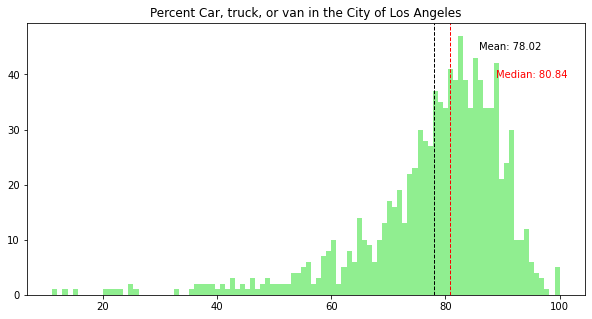

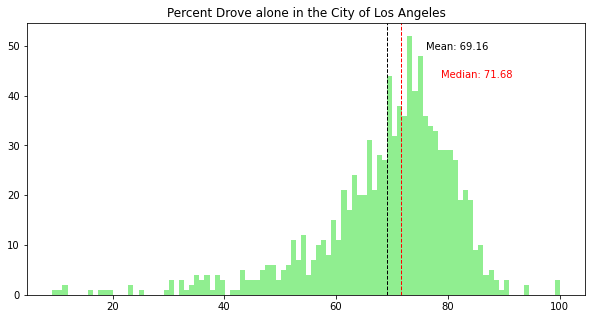

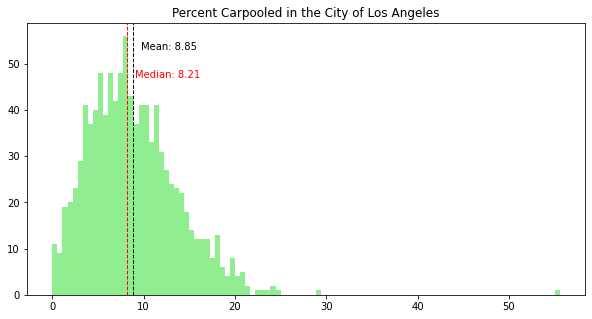

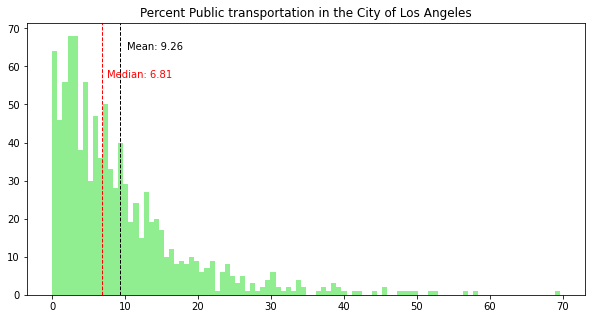

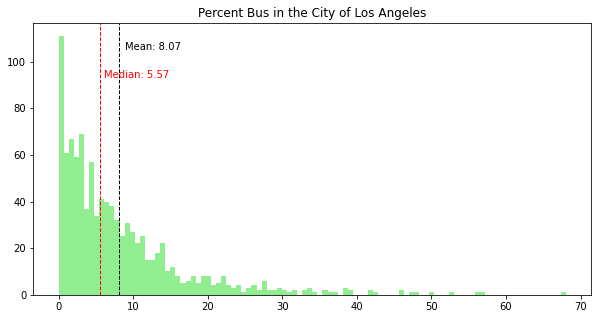

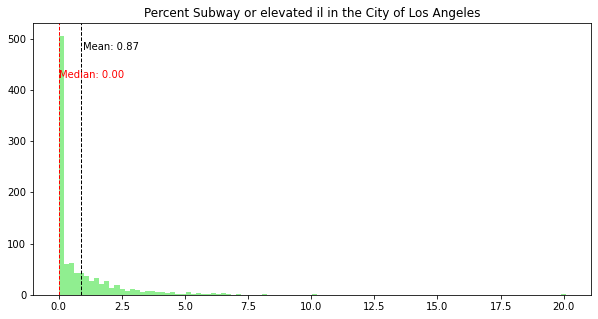

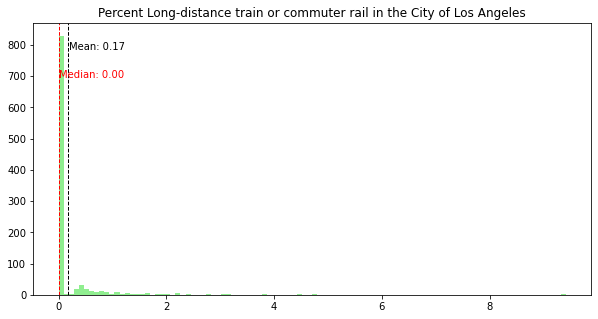

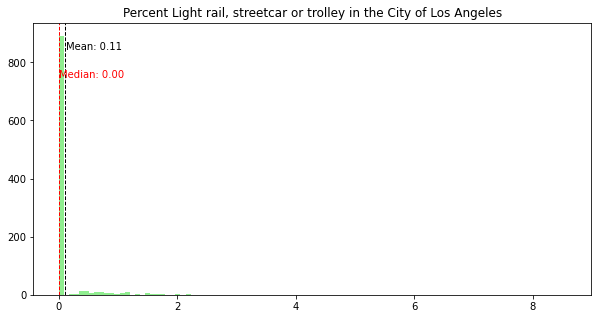

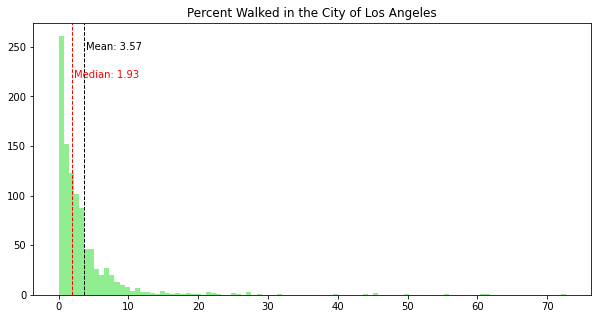

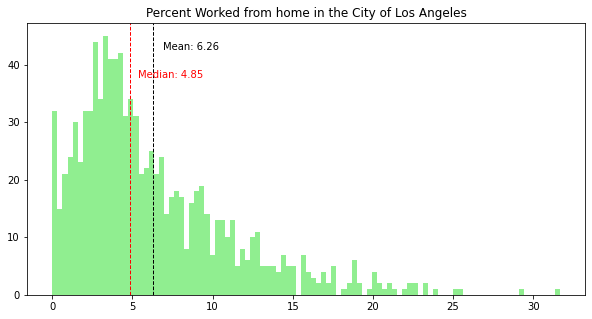

In [41]:
for indicator in m2w_indicators:
    get_histogram(column=indicator)

**What story does it tell?**

**Why these variables:** I have chosen a group of indicators that reflect transit use across LA. Additionally, I have added percent driving, walking, and working from home to act as controls that can be further analyzed with income and race. Through this exploration, I might be able to further expound on reasons for transit use in LA.

**The story (nothing new):** This is a story we have already seen and stated previously, but I seek to further detail these findings on a two-dimensional level as a base line. This represents the first part of my team's research before we dig deeper in specific locations with high transit use. Auto use is the dominant form of travel in LA overwhelmingly.

The public transit and car histograms are inverses of one another. I'm interested in where these high transit areas are located and expect some spatial pattern. I've added heavy rail (subway), heavy rail (commuter), and light rail which I had left out previously. Transit rates for each of these categories are shockingly low. I should also look at the absolute totals as well.

Those distrubtion of those walking to work is also low, and I wonder what spatial patterns will be represented when plotted on a map. Where there be specific areas where walking is concentrated? Are these dense areas? Within Los Angeles, are of high walking rates to work correlated with high transit areas? In terms of those working from home, I would like to see if those areas are also high income and/or if there is transit use. 

Again, the overall transit story is nothing new-- LA is an auto-centric city that has low transit use. This transit use is concentrated in METRO's bus system. What needs to be explored now is why transit use is high in certain areas given the car-oriented design of LA. 

Areas to further explore:
* Location of rail use
* Location of mixed car and transit use
* Availability of cars in households
* Compare transit use to areas of income and race/ethnicty

**Checking total amounts**

In [42]:
def get_histogram2(column = 'Long-distance train or commuter rail'):
    series_to_plot=means2work[column] #change gpd

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=70,color='lightgreen')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in the City of Los Angeles')


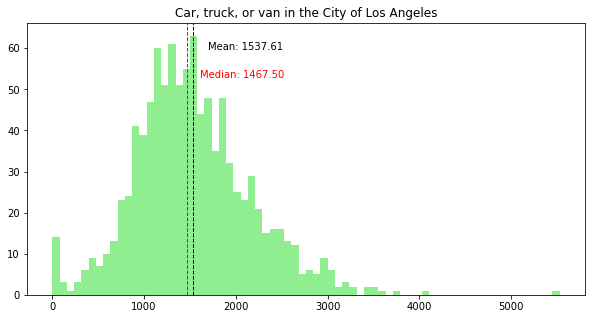

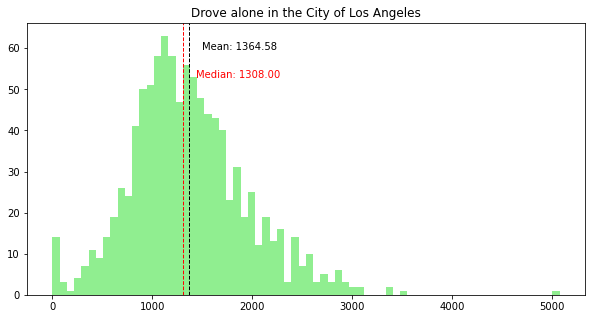

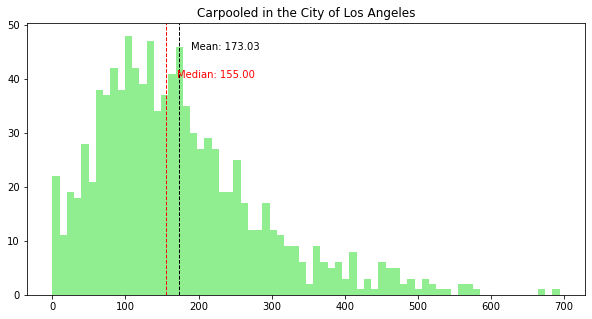

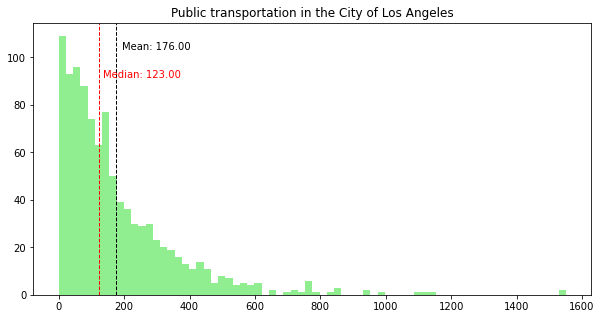

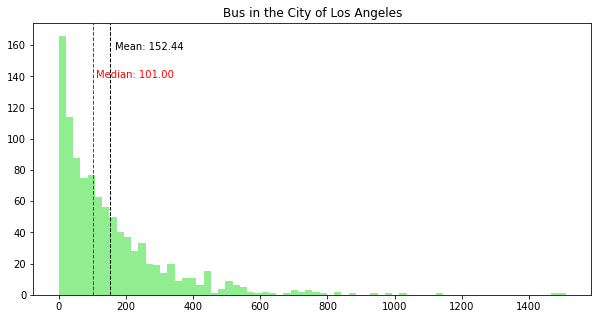

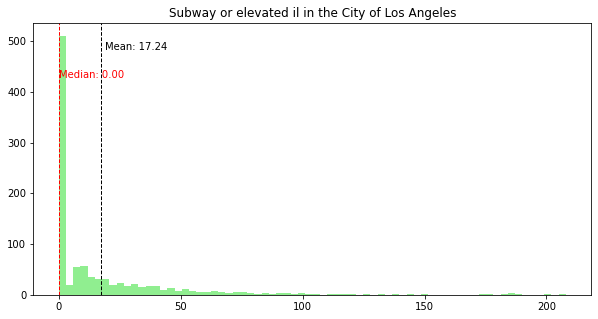

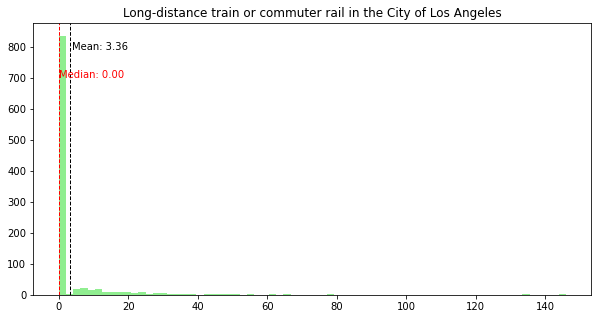

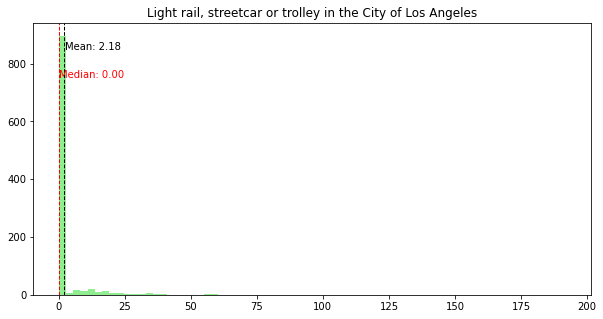

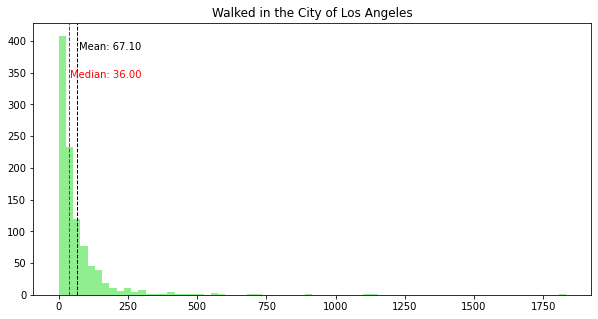

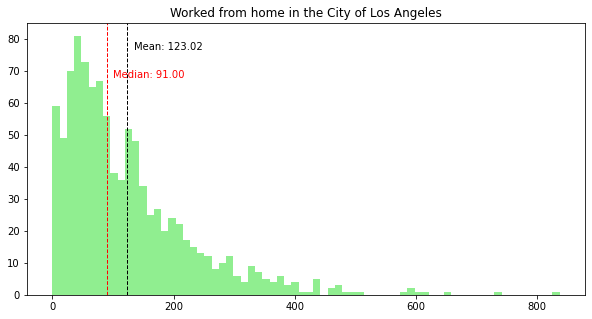

In [43]:
for indicator in m2w_indicators2:
    get_histogram2(column=indicator)

Census tracts vary widely, that being said, I still wanted to visualize the distribution and the mean and median for LA. I epxected these numbers to be much higher given LA's size. 

### Commute Time

Setting up histograms syntax

In [44]:
def get_histogram3(column = 'Percent t_Less than 10 minutes'):
    series_to_plot=time_m2w[column] #change gpd

    plt.figure(figsize=(10,5))

    plt.hist(series_to_plot,bins=100,color='lightgreen')

    plt.axvline(series_to_plot.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(series_to_plot.median(), color='r', linestyle='dashed', linewidth=1)
    min_ylim, max_ylim = plt.ylim()
    plt.text(series_to_plot.mean()*1.1, max_ylim*0.9, 'Mean: {:.2f}'.format(series_to_plot.mean()))
    plt.text(series_to_plot.median()*1.1, max_ylim*0.8, 'Median: {:.2f}'.format(series_to_plot.median()),color='r')
    plt.title(column + ' in the City of Los Angeles')


I'm also realizing my table titles may look a little funny as they are a function of my labeling earlier, but should be good to go

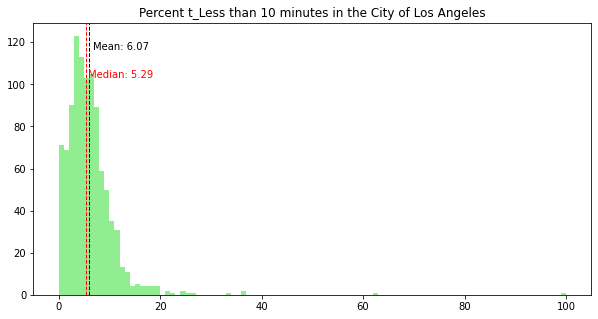

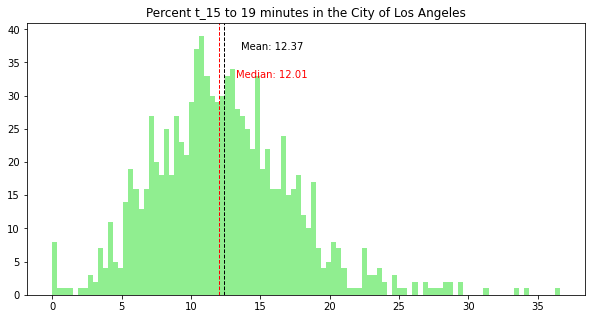

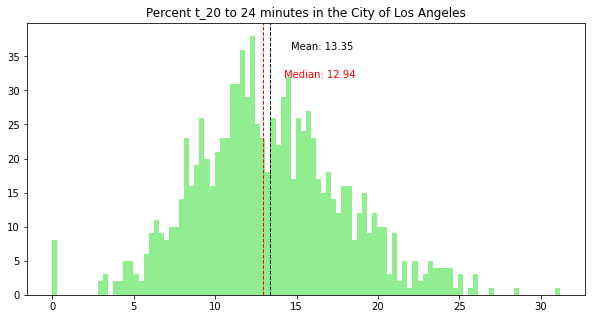

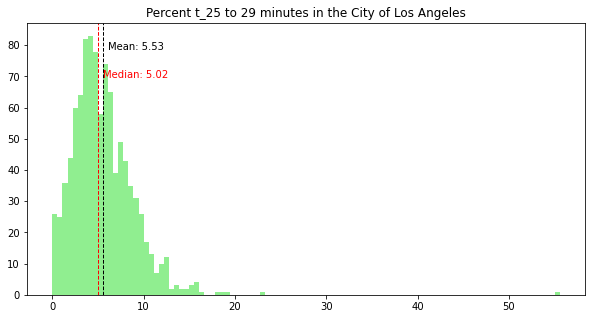

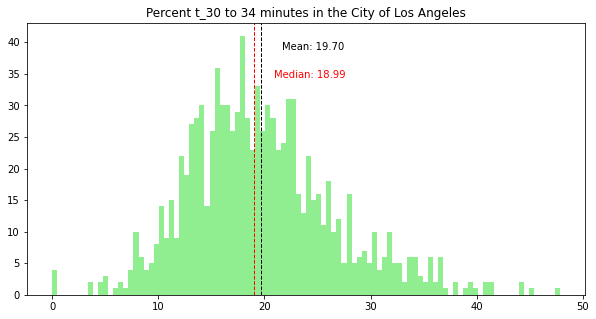

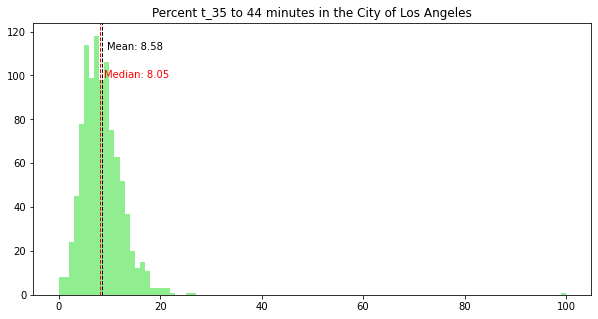

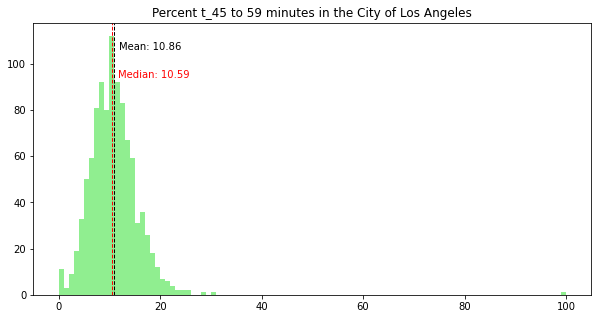

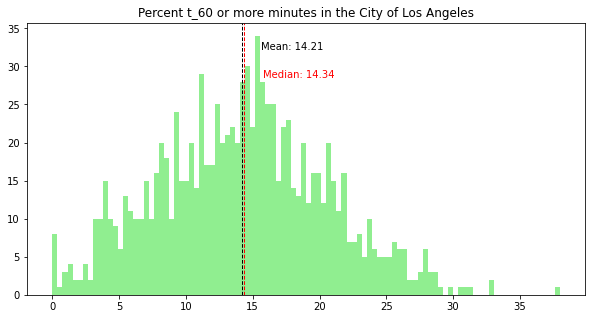

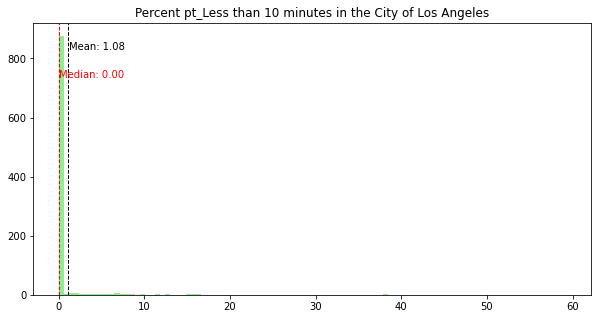

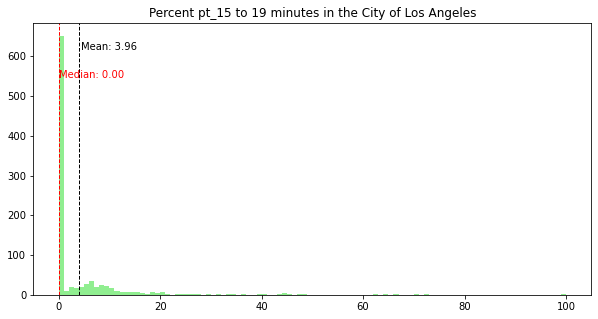

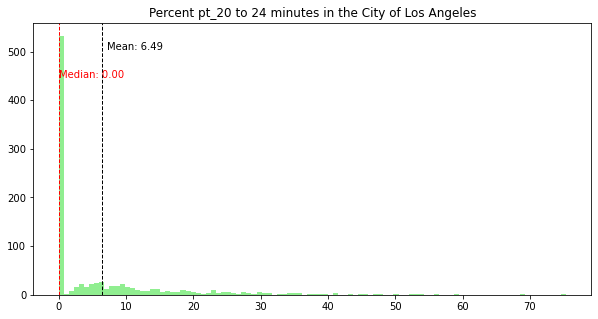

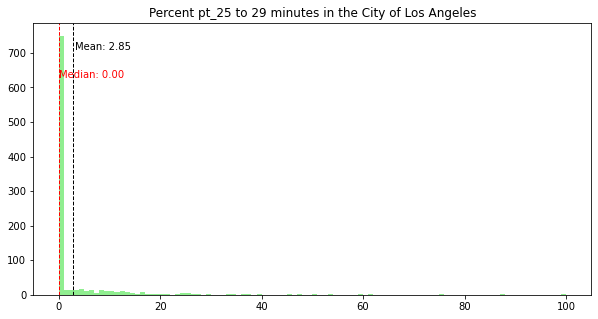

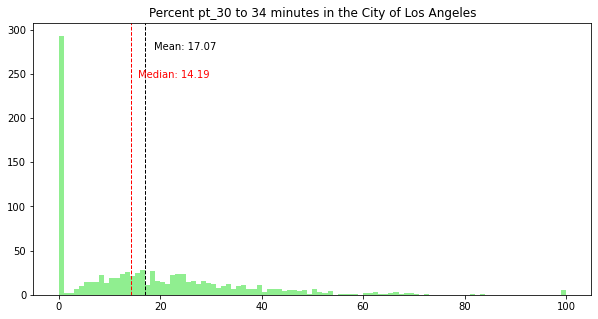

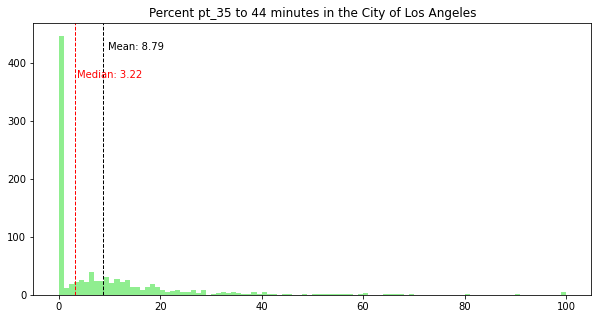

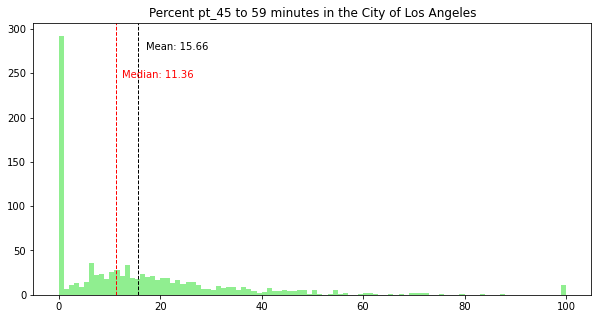

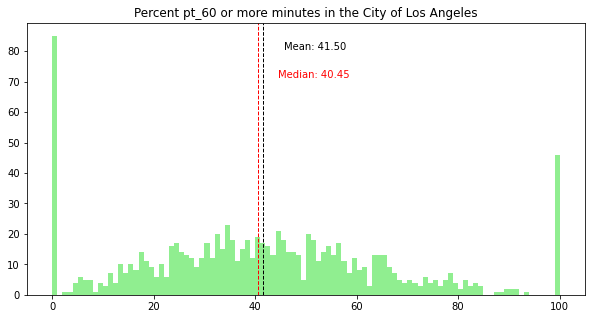

In [45]:
for indicator in commute_indicators_pt:
    get_histogram3(column=indicator)

## Maps

In [46]:
def get_map(column='Percent Long-distance train or commuter rail'):
    ax = means2work.plot(figsize=(10,10),
                  column=column,
                  legend=True,
                 )
    ax.set_title(column, fontsize=14)
    ax.axis('off');

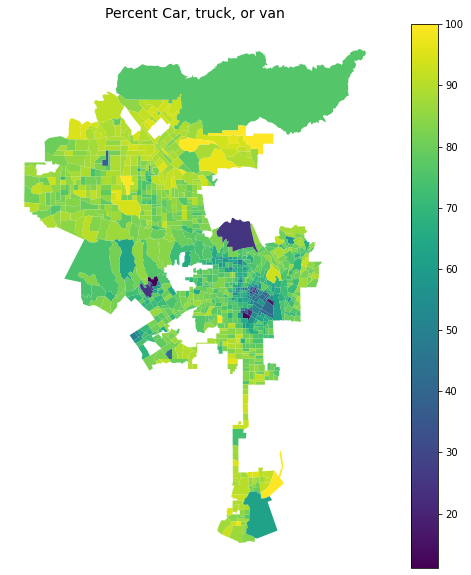

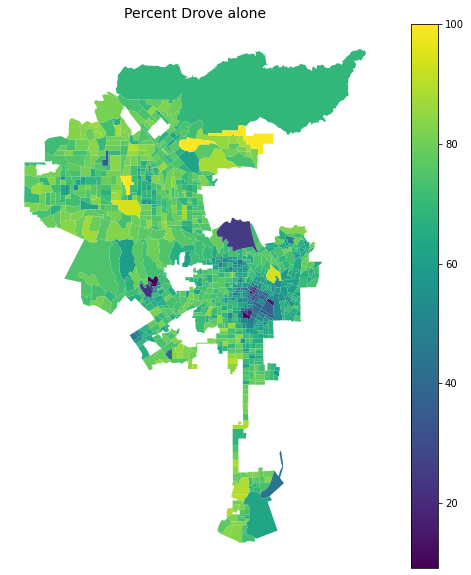

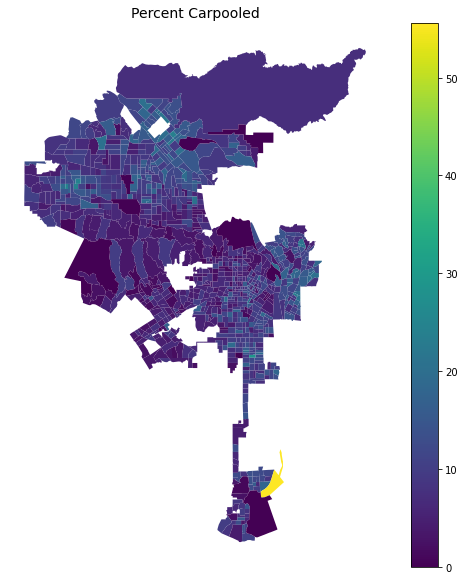

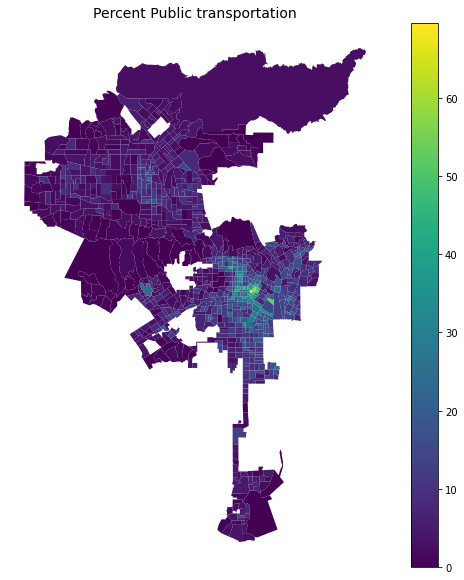

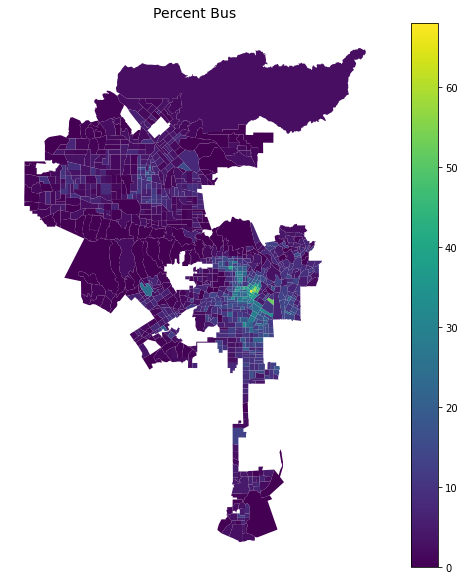

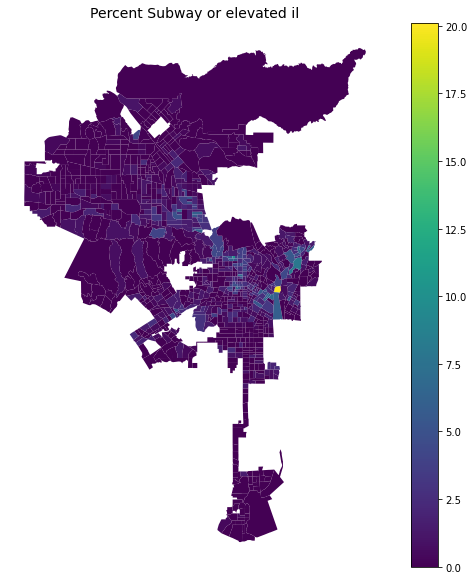

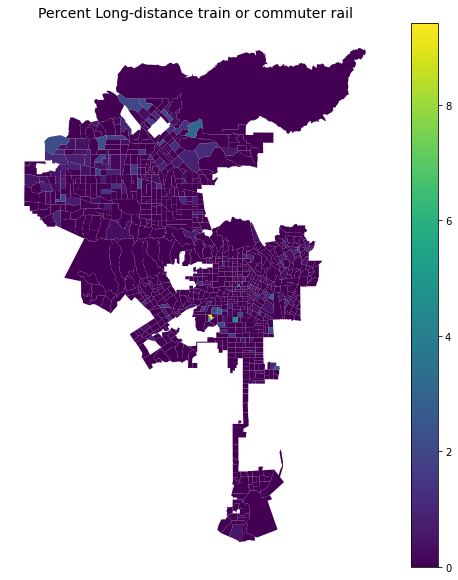

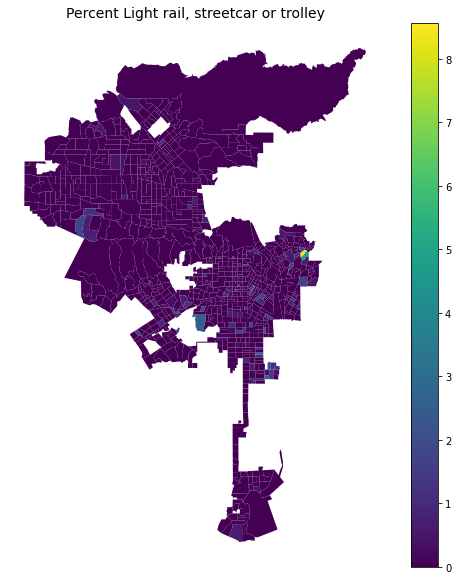

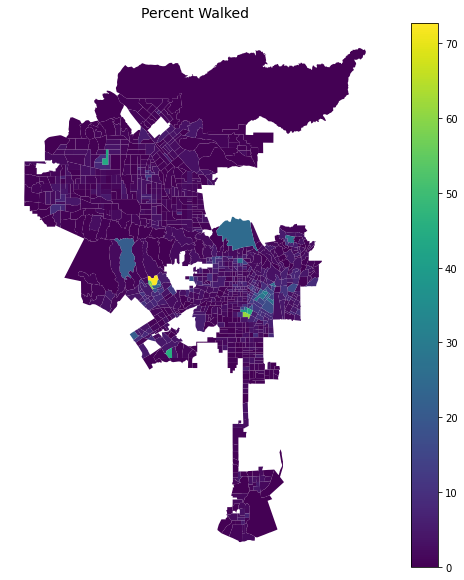

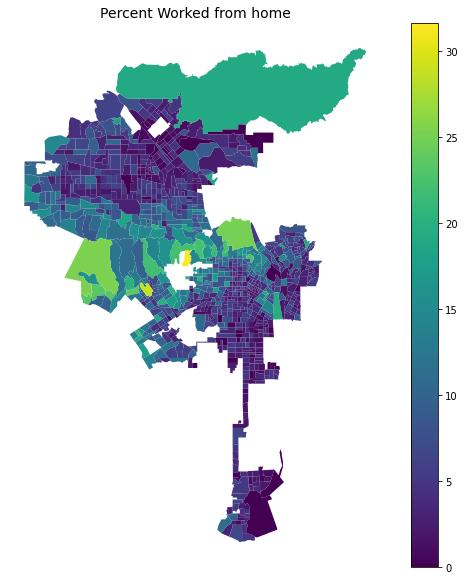

In [47]:
for indicator in m2w_indicators:
    get_map(indicator)

**What story does it tell?**

**The Story (Restating previous told story to establish firm baseline):** Maps show a concentration of high transit use in Central, Eastside, Northeast, and Southeast "regions" of Los Angeles. This is primarily bus ridership. There is some rail, but it remains relatively low proportion of people. There is a "moderate" amount of transit users on the Westside and in the San Fernando Valley. These areas will need further exploration in order to explain their higher relative use of transit compared to the rest of LA. Feedback from the midterm suggests to look at the Metro Orange BRT, Metro Red Line, other busways, and Metrolink commuter rails. I will need to compare to race/eth and income to these areas plus the agglomeration of heavy transit use in Central LA. I'm expecting there to be strong correlations with race/eth and income with transit use from what I remember.
In terms of the "controls" (the non transit variables), a few patterns have emerged. Those walking to work seem to be relegated to the Central LA, and on the Westside between Santa Monica and Beverly Hills (very close to the UCLA campus). Those working from home tend to live heavily in the Valley, though there are pockets on the northern periphery of the Central LA region.
Ongoing:
* Provide a more accurate description, I will need to complete my spatial join between mode of travel to work and LA neighborhoods from the LA Times.
* Zoom in on high transit use areas
* Compare with race/eth and income datasets-
    1. Bus
    2. Rail Light
    3. Rail Heavy
    4. Commuter
* Examine concentration of transit stops in each tract as well as frequency
* Compare w/ commute time (roundabout way to check job-housing spatial matching/mismatching)
* Commute Time Commute Maps

Commute Time Commute Maps

In [48]:
def get_map2(column='Percent pt_60 or more minutes'):
    ax = time_m2w.plot(figsize=(10,10),
                  column=column,
                  legend=True,
                 )
    ax.set_title(column, fontsize=14)
    ax.axis('off');

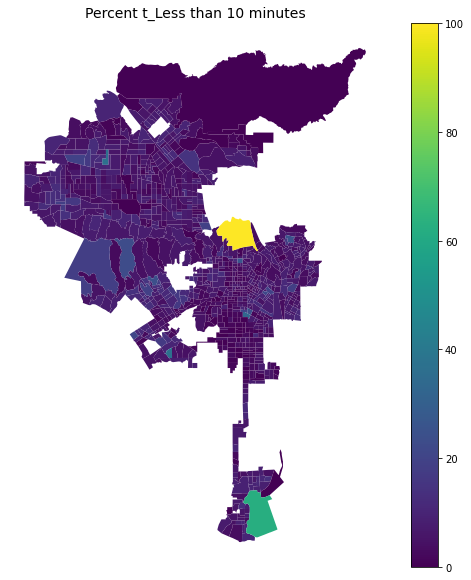

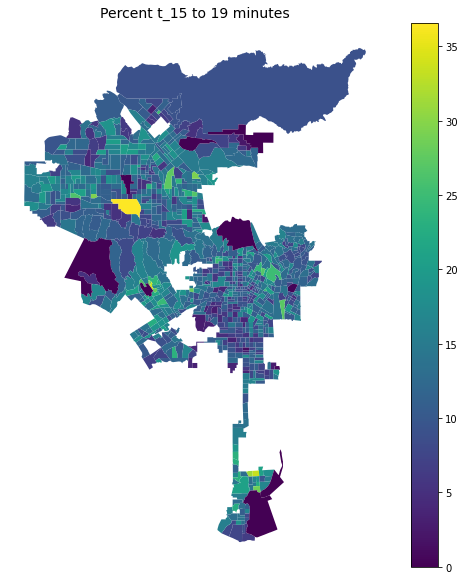

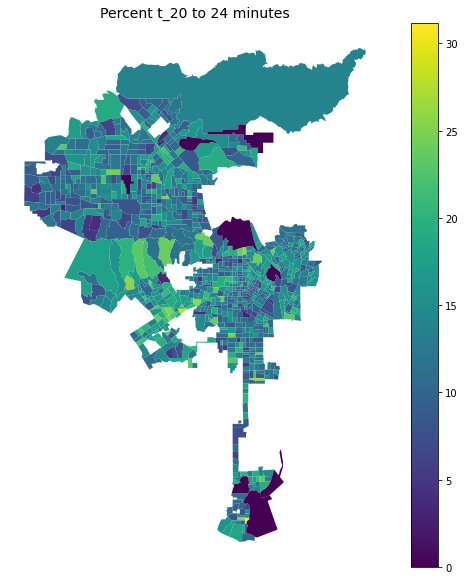

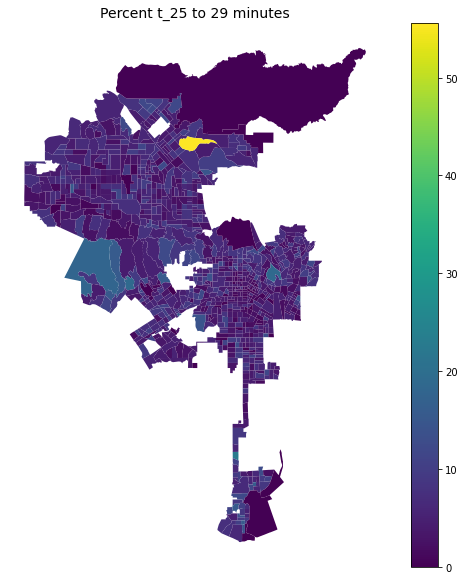

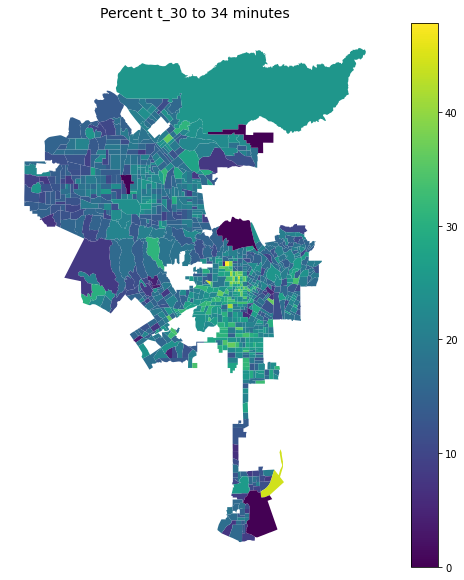

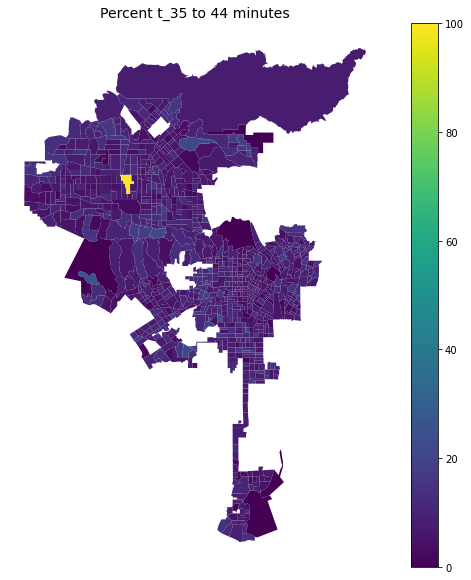

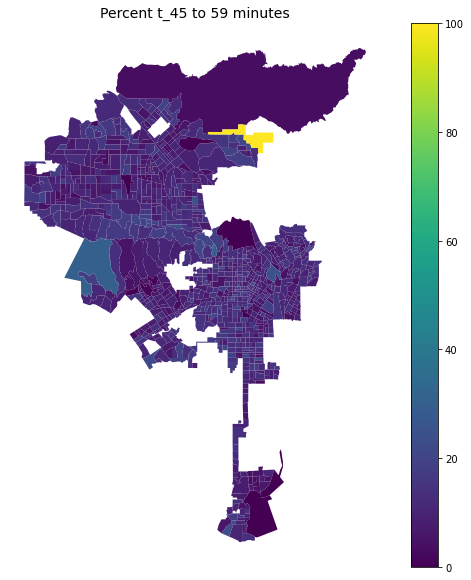

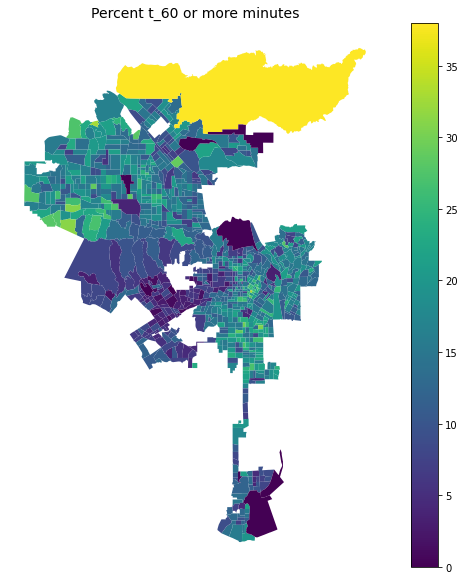

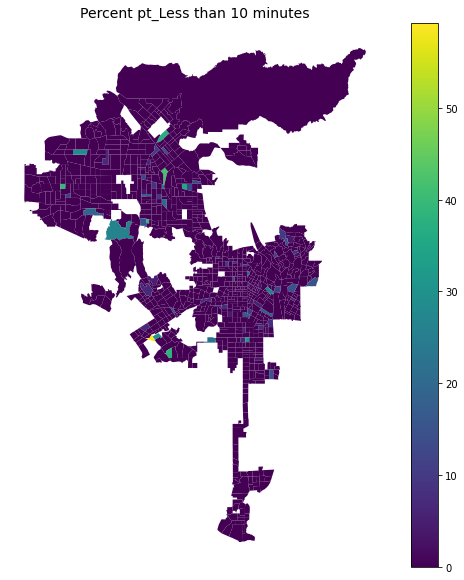

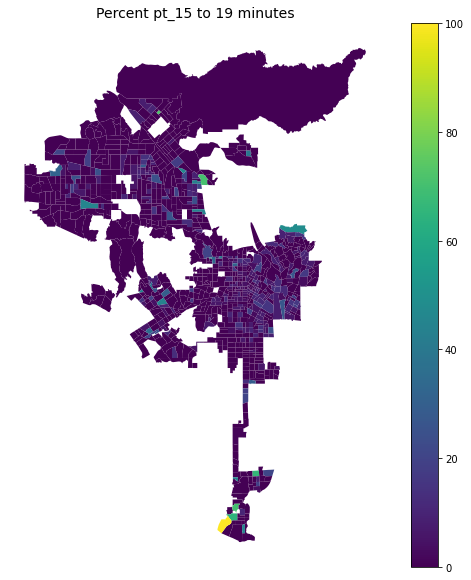

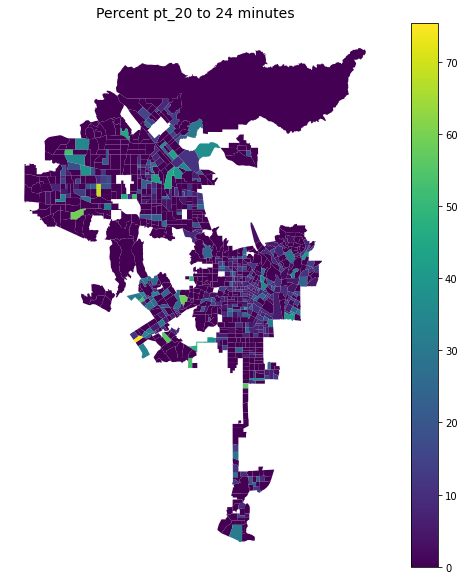

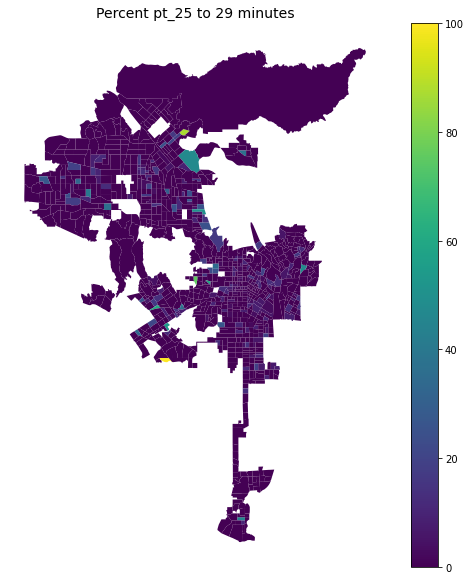

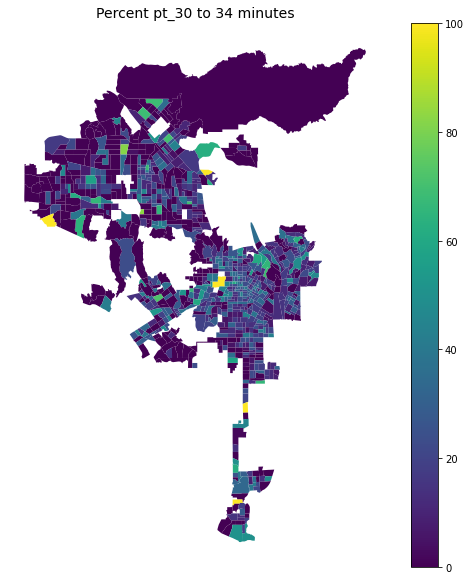

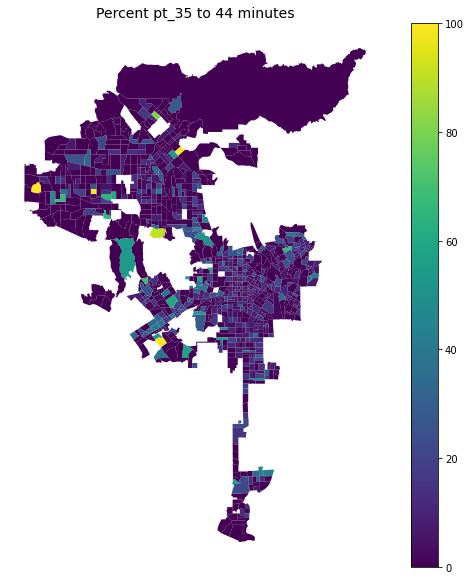

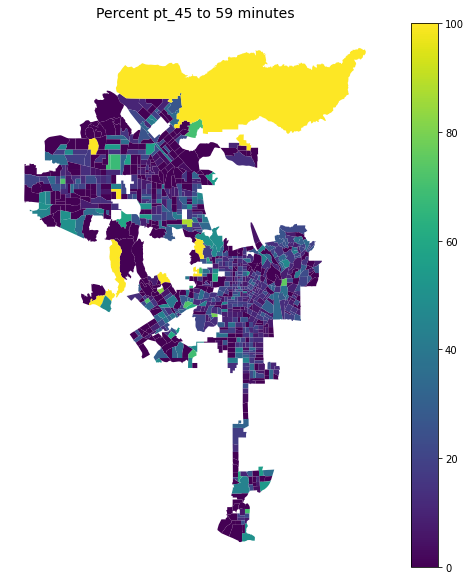

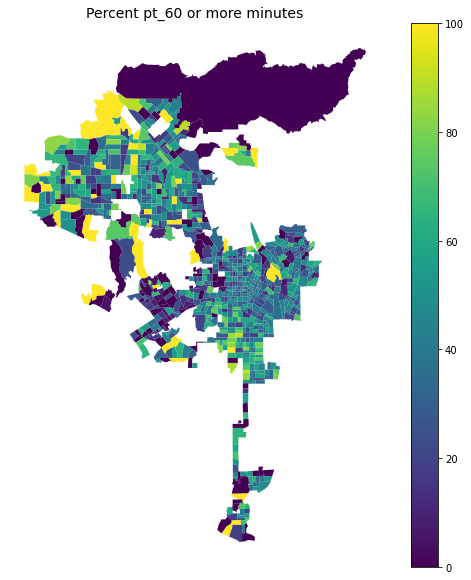

In [49]:
for indicator in commute_indicators_pt:
    get_map2(indicator)

**What story does it tell?**

**The Story:**
This is a new perspective for the narrative of transit ridership in LA, even if this information might not extraordinarily new. My purpose of looking at commute time was to try and gain some insights on where people in LA work in hopes to see if there was a component of mismatching between housing and jobs. There are of course a variety of other factors that go into the where people work and live; that being said, it might reveal some preferences in mode of transit. At the very least, it gives a more complete picture of transit ridership patterns in LA.

In the above maps, there are essentially two groups: the total time of commute to give an overall pattern of commute time in LA and those only using public transit. The distribution for LA overall seems evenly distributed minus a few exceptions. Without looking at any housing data, this could suggest a jobs rich and housing shortage balance for the region. Housing shortages are not a new issue and it should be cautioned that inferences on solely commute time might not be indicative of the full picture. More research is needed on this scope. In terms of public transit commute times, a couple patterns are emerging:
* Public transit that takes 29 minutes or less are a clear minority of workers in LA. That doesn't mean ridership is zero, as there is a significant portion of workers that use transit where it takes 29 minutes or less. 
* The vast majority is traveling 30 minutes or longer with a significant number of workers traveling 60 minutes or longer. This is present in almost every region. 
* It's apparent from the transit maps above for the San Fernando Valley that if workers are using transit, most are traveling 45 minutes or longer with the biggest proportion traveling 60 minutes or longer. There are some other census tracts where residents have less travel time, which would suggest access to a more centrally located transit location or a more localized job.  
* Questions remain on the distance workers have to travel and the kinds of work. Inquiries into this may be more descriptive in nature, but could still be illuminating. 
* I would like to produce an isochrone map, though I'm unsure of how effective it will be with transit ridership. It might at the least give an indication of the distance traveled for workers. 


For further exploration:
* Overlay heavy rail and light rail stops
* Provide more accurate description of the areas through a spatial join
* Compare with race/ethnicity and income data

 # Further Exploration: Spatial Joins

In [50]:
gdf_hoods = gpd.read_file('https://s3-us-west-2.amazonaws.com/mappingla.com/downloads/neighborhoods/la_city.json?_ga=2.19655035.276734209.1613944484-775419131.1602133353')

In [51]:
gdf_hoods

,name,slug,geometry
0,Adams-Normandie,adams-normandie,"MULTIPOLYGON (((-118.30901 34.03741, -118.3057..."
1,Arleta,arleta,"MULTIPOLYGON (((-118.42202 34.22410, -118.4228..."
2,Arlington Heights,arlington-heights,"MULTIPOLYGON (((-118.31591 34.05261, -118.3155..."
3,Atwater Village,atwater-village,"MULTIPOLYGON (((-118.27832 34.15301, -118.2783..."
4,Baldwin Hills/Crenshaw,baldwin-hillscrenshaw,"MULTIPOLYGON (((-118.35626 34.02484, -118.3550..."
...,...,...,...
109,Westwood,westwood,"MULTIPOLYGON (((-118.42991 34.07931, -118.4290..."
110,Wilmington,wilmington,"MULTIPOLYGON (((-118.22476 33.82461, -118.2246..."
111,Windsor Square,windsor-square,"MULTIPOLYGON (((-118.31371 34.07631, -118.3137..."
112,Winnetka,winnetka,"MULTIPOLYGON (((-118.56221 34.23150, -118.5622..."


In [52]:
gdf_hoods.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 114 entries, 0 to 113
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   name      114 non-null    object  
 1   slug      114 non-null    object  
 2   geometry  114 non-null    geometry
dtypes: geometry(1), object(2)
memory usage: 2.8+ KB


In [53]:
# function to create a council district map
def hood_map(name = 'Boyle Heights', column = 'Percent Public transportation'):
    # this hood
    this_hood = gdf_hoods[gdf_hoods['name']==name]
    
    # spatial join to get tracts
    tracts = gpd.sjoin(means2work,this_hood)

    # plot it
    fig,ax = plt.subplots()

    # map
    tracts.plot(ax=ax,
                column=column, 
                vmin=0,
                vmax=100,
                legend=True)

    ax.axis('off')
    ax.set_title('Neighborhood ' + name + '\n(' + column + ')', fontsize=14)

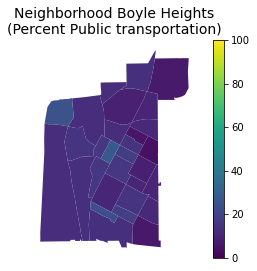

In [54]:
hood_map()

In [55]:
for index, row in gdf_hoods(20):
    hood_map(name = row['name'])

TypeError: 'GeoDataFrame' object is not callable